In [1]:
!pip install -q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.8 MB/s eta 0:00:00


In [3]:
! pip install scikit-learn==1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision as tv
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import time
import os
import copy
import requests
import io

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
from google.colab import files
files.upload()
! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d dhoogla/cicddos2019
! mkdir -p "/content/gdrive/MyDrive/Datasets/ddos"
! unzip cicddos2019.zip -d "/content/gdrive/MyDrive/Datasets/ddos"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open cicddos2019.zip, cicddos2019.zip.zip or cicddos2019.zip.ZIP.


In [7]:
data_dir = "/content/gdrive/MyDrive/Datasets/ddos"
full_data = pd.DataFrame()

# Loop through the directory, read each Parquet file, and append to the DataFrame
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.endswith('.parquet'):  # Check if the file is a Parquet file
            file_path = os.path.join(dirname, filename)
            data = pd.read_parquet(file_path)  # Read the Parquet file
            full_data = pd.concat([full_data, data], ignore_index=True)

# Display the combined DataFrame
print(full_data)

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             17              1                  2                       0   
1             17              1                  2                       0   
2             17              2                  2                       0   
3             17              1                  2                       0   
4             17              1                  2                       0   
...          ...            ...                ...                     ...   
431366         6             53                  1                       2   
431367         6             66                  1                       2   
431368        17          26288                  2                       2   
431369         6          30679                  1                       1   
431370         6             67                  1                       2   

        Fwd Packets Length Total  Bwd Packets Length Total  \
0

In [8]:
column_names = full_data.columns

# Print the column names
print(column_names)

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [9]:
import pandas as pd
samples = full_data
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0')
samples = samples.replace(np.inf,0)
#samples = samples.replace('nan','0')
samples['Flow Packets/s'] = pd.to_numeric(samples['Flow Packets/s'])

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'])

import pandas as pd

# Assuming 'samples' is your DataFrame and 'label' is the column indicating attack or no attack

# Calculate the correlation matrix

#Label


# Assuming 'samples' is your DataFrame and 'label' is the column that contains the category labels
samples['Label'] = samples['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Convert 'label' column to integer type to ensure it's not float
samples['Label'] = samples['Label'].astype(int)

# Now the 'label' column will be in binary format with integer type

correlation_matrix = samples.corr()

# Get the correlation with the 'label' column
label_correlation = correlation_matrix['Label']

# Sort the features by the absolute values of their correlation with 'label', in descending order
sorted_label_correlation = label_correlation.abs().sort_values(ascending=False)

# Exclude the 'label' itself and get the top 12 features
top_12_features = sorted_label_correlation[1:13]  # start from 1 to exclude the 'label' itself

print("Top 12 features based on correlation with 'label':")
print(top_12_features)



print('Training data processed')

Top 12 features based on correlation with 'label':
Down/Up Ratio             0.622436
URG Flag Count            0.587524
Avg Fwd Segment Size      0.561329
Fwd Packet Length Mean    0.561329
Packet Length Min         0.551962
Fwd Packet Length Min     0.548635
Packet Length Mean        0.508163
Bwd Packet Length Min     0.460642
Avg Packet Size           0.458340
Protocol                  0.436748
CWE Flag Count            0.404567
Avg Bwd Segment Size      0.368311
Name: Label, dtype: float64
Training data processed


In [10]:
samples = samples.sample(frac=1).reset_index(drop=True)

In [11]:
correlation_matrix = samples.corr()
# Get the correlation with the 'label' column and sort the values
label_correlation = correlation_matrix['Label'].sort_values(ascending=False)

# Print the top 10 features with the highest correlation with 'label'
print(label_correlation.head(15))

Label                       1.000000
Avg Fwd Segment Size        0.561329
Fwd Packet Length Mean      0.561329
Packet Length Min           0.551962
Fwd Packet Length Min       0.548635
Packet Length Mean          0.508163
Avg Packet Size             0.458340
Protocol                    0.436748
Fwd Packet Length Max       0.321394
Fwd Act Data Packets        0.172641
Flow IAT Mean               0.148176
Subflow Fwd Bytes           0.130906
Fwd Packets Length Total    0.130906
Fwd IAT Mean                0.125473
Flow Bytes/s                0.114216
Name: Label, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split
X = samples.drop('Label', axis=1)  # 'label' is your target column
y = samples['Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9993045494059692
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19542
           1       1.00      1.00      1.00     66733

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



In [15]:
import pickle

# Assume `clf` is your trained RandomForest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)


In [ ]:
random_rows = X.sample(n=20)

# Print the selected random rows
print(random_rows)
y_pred_rand = clf.predict(random_rows)
print(y_pred_rand)


In [16]:
print(clf)

RandomForestClassifier(random_state=42)


In [ ]:
print(samples)

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              6          40259                  5                       4   
1              6             69                  2                       2   
2             17         106997                  4                       0   
3              6      112133939                 16                      10   
4             17             50                  2                       0   
...          ...            ...                ...                     ...   
431366        17             48                  2                       0   
431367        17           8205                 20                       0   
431368         6       51928672                 10                       4   
431369        17        3155517                  4                       0   
431370        17          54897                  2                       2   

        Fwd Packets Length Total  Bwd Packets Length Total  \
0

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn import tree
# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9995131845841785
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19632
           1       1.00      1.00      1.00     66643

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



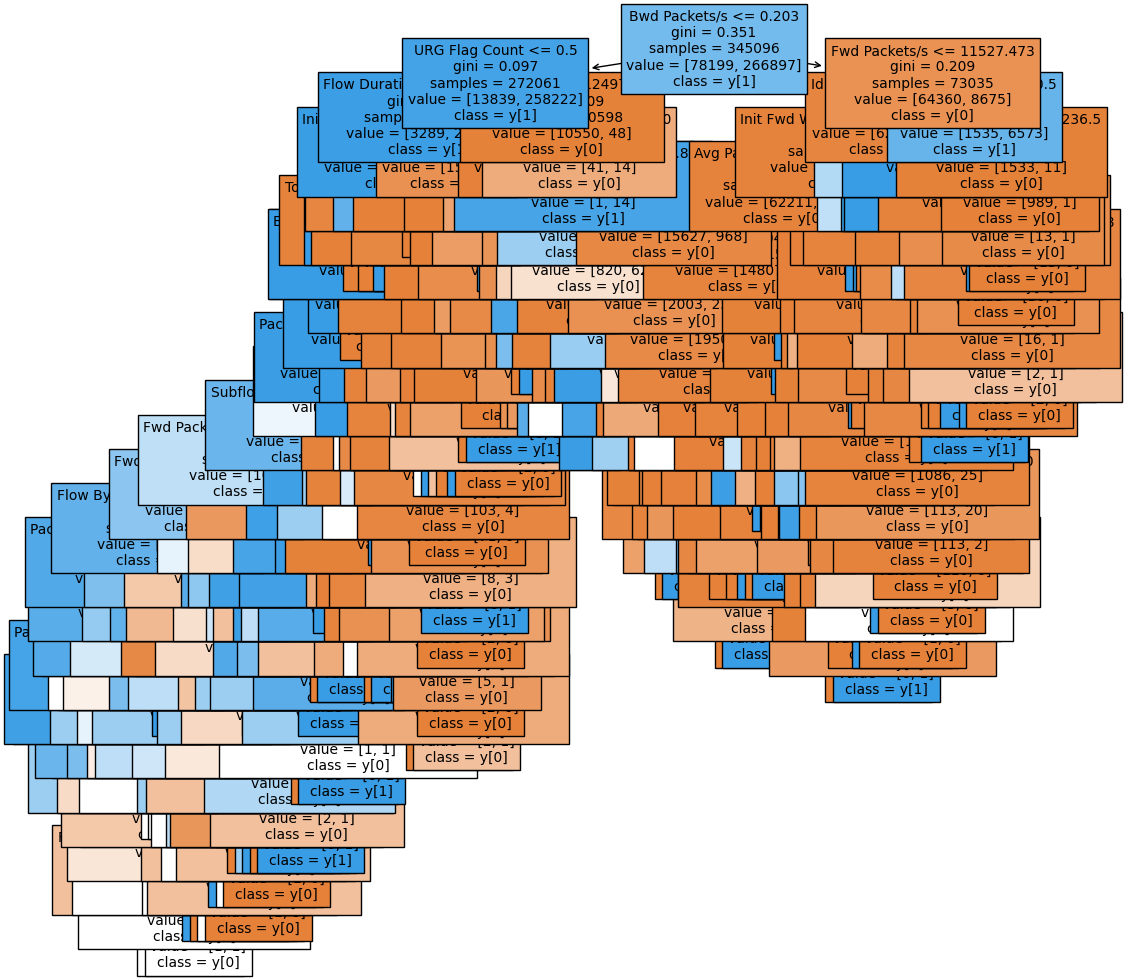

In [ ]:
# Visualize the tree
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size according to your needs
tree.plot_tree(dt_classifier, filled=True, fontsize=10, ax=ax, feature_names=X.columns, class_names=True)
plt.show()


In [ ]:
with open('model.pkl', 'wb') as file:  # 'wb' denotes writing in binary mode
    pickle.dump(dt_classifier, file)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
with open('gradientboost.pkl', 'wb') as file:  # 'wb' denotes writing in binary mode
    pickle.dump(gb_classifier, file)